In [1]:
                                                                    #
                                                                    #
                                                                    # MJ LOG: 1419.121117
                                                                    #
                                                                    # finally, phew, 
                                                                    # nearly completed this journey to a single perceptron
                                                                    # and learning from deeplearning.ai
                                                                    # a lot math and calculus, but even more fun to write it in R
                                                                    #
                                                                    # the idea of nn is quite simple and straightforward
                                                                    # taking the input, excite neurons and produce adenosine
                                                                    # then it comes down to reduce noises (optimization) 
                                                                    # and the speed (optimization again for network converge)
                                                                    # most of the business problems does not require CNN or RNN
                                                                    # rather solved by single or double hidden layer of
                                                                    # vanilla neural networks
                                                                    #
                                                                    # MJ LOG: 2200.121117
                                                                    #
                                                                    # for choosing number of layers
                                                                    #     One hidden layer is sufficient for large majority of problems.
                                                                    #     It is like huh?!
                                                                    #
                                                                    # 0 - Only capable of representing 
                                                                    #     linear separable functions or decisions.
                                                                    # 1 - Can approximate any function that contains a continuous mapping
                                                                    #     from one finite space to another.
                                                                    # 2 - Can represent an arbitrary decision boundary to 
                                                                    #     arbitrary accuracy with rational activation functions and 
                                                                    #     can approximate any smooth mapping to any accuracy.
                                                                    #
                                                                    # for choosing number of neurons
                                                                    #     somewhere between number of inputs and output
                                                                    #     I tend to like the square root formula below
                                                                    #
                                                                    #     n = n.obs / (2 * (n.parm + n.target))
                                                                    #                 the scaling factore can be 2~
                                                                    #     n = sqrt (n.parm * n.target)
                                                                    #
                                                                    #    the above formula are not golden rules, rather reference
                                                                    #  "Very simple. 
                                                                    #   Just keep adding layers until the test error does not improve anymore."
                                                                    #  - G. Hinton
                                                                    #
                                                                    # again, some calls parameters, some calls input, 
                                                                    # while others call features; patato (perteito, pertahto)
                                                                    #
                                                                    # MJ LOG: 0112.131117
                                                                    #
                                                                    # set two parameters for iterations and bias
                                                                    #
                                                                    #
make.it.so <- function(iter=100, bias=0){                           #
                                                                    #
                                                                    # Prepare data for model 
                                                                    #            species ~ Sepal.Length + Sepal.Width
                                                                    #
  x1 <- head(iris$Sepal.Length, 100)                                # iris sepal length
  x2 <- head(iris$Sepal.Width, 100)                                 # iris sepal width
  x  <- matrix(cbind(x1, x2), nrow=100, ncol = 2)                   # 
  y  <- append(rep(1, 50), rep(-1, 50))                             # setosa = 1, versicolor = -1, discard virginica
                                                                    # until one day I'm drunk enough to write softmax function
                                                                    #
                                                                    # vannila it is
                                                                    #        2 inputs
                                                                    #        3 layers (input, hidden, output)
                                                                    #        1 perceptron
                                                                    #        1 output with 2 levels
                                                                    #
  n.iter <- iter                                                    # number of iterations
  epoch  <- 1                                                       # mini batch, no used here
                                                                    #   epoch recommendation 2^(6~9) = 64, 128, 256, 512
                                                                    #   RoT: can fit into CPU/GPU memory
  n.obs  <- nrow(x)                                                 # number of samples / observations
  n.parm <- ncol(x)                                                 # number of parameters / input / features
  b      <- bias                                                    # bias, not really used here, or could try out .01
                                                                    #       mind bias is per neuron, 
                                                                    #       and can be initialized the same way as weights
  alpha  <- 0.1                                                     # learning rate
  y.hat  <- rep(0, n.obs)                                           # predications y.hat, baseline
  prob   <- rep(0, n.obs)                                           #   probability
  loss   <- rep(0, n.iter)                                          #   record log loss for each iteration
  w      <- rnorm(2) * .01                                          # initialize weight, start small
  # w    <- w/sum(w^2)                                              # normalize the initialization, overkill for this ?
                                                                    # large w would end up at the flat side of tanh
                                                                    # slow down the gradient descent, slow to converge for whole nn
  eps    <- 1e-15                                                   # epsilon, threshold for log loss to deal corner case of 0 and 1  
                                                                    #
  for(i in 1:n.iter) {                                              # iterate
    for(j in 1:n.obs){                                              #  through all observations / samples
      p        <- tanh(w[1]*x[j, 1] + w[2]*x[j, 2] + b)             # tanh activation
                                                                    # other activation function like 
                                                                    #     cos
                                                                    #     sigmoid/logistic
                                                                    #     softmax for multi-class target
                                                                    #     linear, without applying any function
                                                                    #     softplus, ReLU
                                                                    #
      prob[j]  <- ifelse(p>0, p, 1+p)                               # probablity for y.hat==1
      prob[j]  <- pmin(pmax(prob[j], 1e-15), 1-1e-15)               # account 0 and 1 value for log loss
      y.hat[j] <- sign(p)                                           # predicated y
                                                                    # perhaps better use to account 0
                                                                    # doubting the function of sign, as it would miss the value 0
                                                                    # perhaps better be explicit on >=0 than using sign
                                                                    # y.hat    <- (p>=0)
      eta  <- y[j] - y.hat[j]                                       # error
                                                                    # if this is kept, then MAE, MSE can be calculated later
                                                                    # see previous commits, MAE, MSE plots were removed
                                                                    # loss     <- -(y * log(p) + (1 - y) * log(1 - p))
                                                                    # as they really not a good indicator
      w[1] <- w[1] + alpha * eta * x[j,1]                           # update w1, stochastic gradient descent
      w[2] <- w[2] + alpha * eta * x[j,2]                           # update w2
      b    <- b    + alpha * eta * b                                # update bias
      # alpha = alpha /(1+decay_rate * epoch)                       # learning rate decay, might be last thing to try for tuning
                                                                    #    alpha = power(.95, epoch) * alpha
                                                                    #    alpha = k / sqrt(epoch)   * alpha
                                                                    #    manual decay
                                                                    # feels like monte carlo simulation all over again, um
                                                                    #
    }                                                               #  // END LOOP OBSERVATIONS //
                                                                    # log loss L(...) = -(y*log(p) + (1-y)*log(1-p))
                                                                    # kaggle usually uses log loss to score classifier performance
                                                                    # might be a bad naming convention here
                                                                    # some say loss and cost are synonymous
                                                                    # some say loss is for observation (sample) computation,    
                                                                    #          cost is for full data set
                                                                    #     objective is for gernal naming of the objective function
                                                                    # I'm like whatever, just pick the one you like
    loss[i] <- -(mean(y * log(prob) + (1 - y) * log(1 - prob)))     #
                                                                    # derivative log loss seems more appropriate for nn
                                                                    #          dL = -(y/y.hat) + (1-y)/(1-y.hat)
                                                                    # dL[i] <- -mean(y/prob+(1-y)/(1-prob))                   
                                                                    # early stop to avoid overfitting
                                                                    # but when ?
                                                                    #  monitoring the converge trend of w ?
                                                                    #  monitoring log loss or derivate log loss
                                                                    #  cross validation to compare training error and validation error ?
                                                                    #
                                                                    # batch norm ?
                                                                    # reduce cov shift through layers
                                                                    #
                                                                    # test time considerations of mu, sigma for normalization
                                                                    # estimate using exponentially weighted average
                                                                    # across mini batches
                                                                    #
  }                                                                 # // END LOOP ITER //
                                                                    #
  cat("Results for last iteration:", i, "\n")                       # show 'n tell
  cat("w1 = ", w[1], "\n")                                          # weights of last iteration      
  cat("w2 = ", w[2], "\n")                                          #
  cat("bias = ", b, "\n")                                           # bias of last iteration
  cat("Misclassification rate:", sum(y.hat != y)/n.obs, "\n")       # misclassification rate of last iteration
  plot(table(y, y.hat), color="#66cc00", main="confusion matrix")   # confusion matrix of last iteration
  plot(loss, xlab="# iteration", ylab="log loss", type="l")         # log loss plot to see convergence 
                                                                    #
                                                                    # how to store the model for future prediction ?
                                                                    # pretty much doing the high school math for prediction 
                                                                    # remember to do the SIGN thing to get the classifier
                                                                    #
                                                                    #     pred = ACT(w1 * x1 + w2 * x2 + b)
                                                                    #
}                                                                   # // MAKE IT SO //
                                                                    #
                                                                    #
                                                                    # dropouts in deep network
                                                                    #  it seems insane to randomly kill neurons in the network
                                                                    #  and shockingly it works
                                                                    #  then think about that our brain cells die every single seconds
                                                                    #  we turns out to be ok, well, suffering memory loss or hardly recall
                                                                    #  the issue here is not to kill in training set, 
                                                                    #  rather how to treat validation and testing set, trick was ...
                                                                    #  double the training weights (if my brain cell for that was not killed)
                                                                    #  think again, it is like Darwin's evolution theory
                                                                    #
                                                                    # MJ LOG: 1818.141117
                                                                    #
                                                                    # ResNet
                                                                    # CNN
                                                                    # RNN
                                                                    # Capsule
                                                                    # Time series prediction
                                                                    # Not really nn, but worth look into xgboost
                                                                    #
                                                                    # Advice from Hinton
                                                                    #   If everyone tells you that is plain wrong, 
                                                                    #   then you know you are onto something.
                                                                    #
                                                                    # inception network
                                                                    #
                                                                    #
                                                                    #
                                                                    #
                                                                    # LLAP
                                                                    #
                                                                    #     ___________________          _-_                         
                                                                    #    \==============_=_/ ____.---'---`---.____
                                                                    #                \_ \    \----._________.----/
                                                                    #                  \ \   /  /    `-_-'
                                                                    #              __,--`.`-'..'-_
                                                                    #             /____          ||
                                                                    #                  `--.____,-'
                                                                    #

Results for last iteration: 500 
w1 =  -13.19677 
w2 =  23.19687 
bias =  0 
Misclassification rate: 0.03 


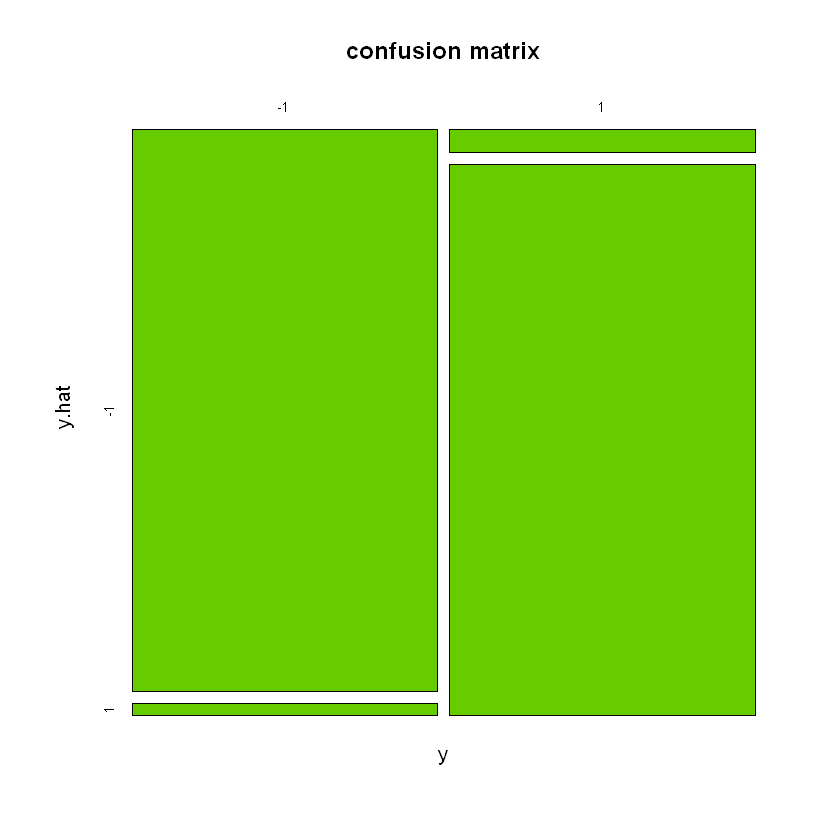

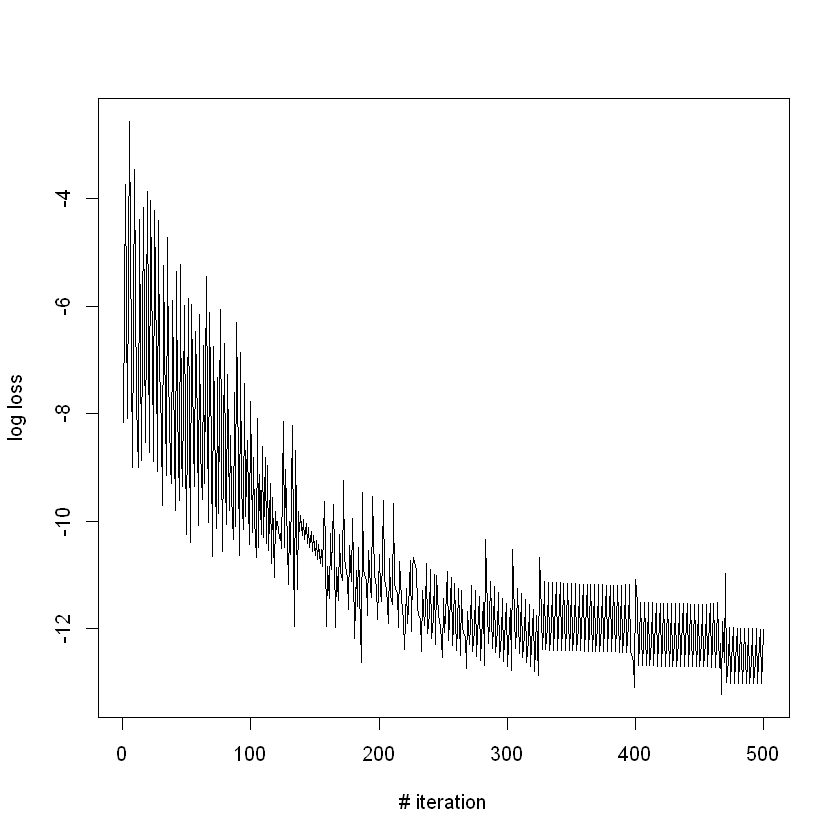

In [3]:
make.it.so(500)